In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Coefficient Interpretation on Different Scales
In this notebook we'll interpret a regression model's coefficients to understand the relationship between the predictors and the response. We'll be using the now familiar advertising data.

In [2]:
df = pd.read_csv('../../data_sets/Advertising.csv', index_col=0) #Taking the first columns as index
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


All values are in thousands of dollars.
Again, we want to predict Sales from the various media advertising budgets.

So next we'll create our predictor matrix, $X$ and response vector, 
$y$.

In [3]:
X = df.drop('Sales', axis=1)
y = df.Sales.values

In [4]:
lm = LinearRegression().fit(X, y)

Now we inspect the predictor coefficient values derived from the fit.\
These are the $\beta$ values that maximize our $R^2$ loss.

In [5]:
# you can learn more about Python format strings here:
# https://docs.python.org/3/tutorial/inputoutput.html
# https://docs.python.org/3/library/string.html#formatspec

print(f'{"Model Coefficients":>9}') #Alinear a la derecha con un ancho de 9 caracteres
for col, coef in zip(X.columns, lm.coef_): #zip() combina dos iterables en pares
    print(f'{col:>9}: {coef:>6.3f}')
print(f'\nR^2: {lm.score(X,y):.4}')


Model Coefficients
       TV:  0.046
    Radio:  0.189
Newspaper: -0.001

R^2: 0.8972


As mentioned above, the original units are in thousands of dollars. To make discussion a bit simplier we'll convert this to dollars by multipling our original DataFrame by 1000. This will also help illustrate a point about **feature scaling**.

In [6]:
df *= 1000
df.head()

,TV,Radio,Newspaper,Sales
1,230100.0,37800.0,69200.0,22100.0
2,44500.0,39300.0,45100.0,10400.0
3,17200.0,45900.0,69300.0,9300.0
4,151500.0,41300.0,58500.0,18500.0
5,180800.0,10800.0,58400.0,12900.0


What happen to the coefficients of the model now that it's been fit on scaled up data? 

In [7]:
#Refit a new regression model on the scaled data

X = df.drop('Sales', axis=1)
y = df.Sales.values
lm = LinearRegression().fit(X,y)

print(f'{"Model Coefficients":>9}')
for col, coef in zip(X.columns, lm.coef_):
    print(f'{col:>9}: {coef:>6.3f}')
print(f'\nR^2: {lm.score(X,y):.4}')


Model Coefficients
       TV:  0.046
    Radio:  0.189
Newspaper: -0.001

R^2: 0.8972


The coefficients and the loss are exactly the same! This is not a fluke. **Linear regession coeffients are invariant under scaling**. That's because we've scaled both the predictors *and* the response by the same amount.

Think of it this way:\
If a \$1,000 increase in the `TV` budget is associated with a $\beta$ thousand dollar increase in `Sales`, then a \$1 increase in `TV` will result in an observed $\beta$ dollar increase in `Sales`.

#### Visual Interpretation

Let's create a visualization to help us interpret our model's coeffients.\
We'll use a horizontal bar plot.

Text(0.5, 1.0, 'Coefficients of Linear Model Predicting Sales\n from Newspaper, Radio, and TV Advertising Budgets (in Dollars)')

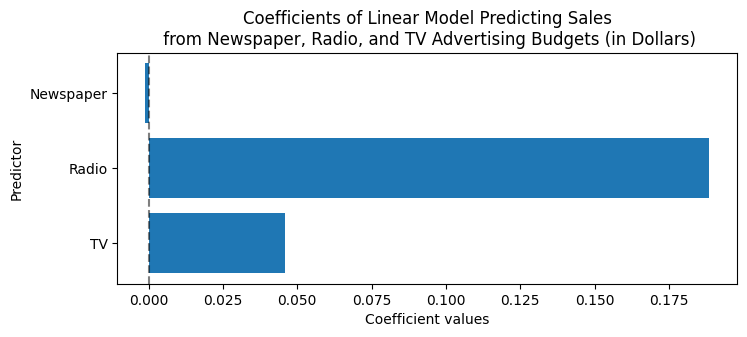

In [8]:
plt.figure(figsize=(8,3))
# Column names to be displayed on the y-axis
cols = X.columns
#Coefficient values for our fitted model (intercept isn't included)
coefs = lm.coef_
#Create de horizontal barplot
plt.barh(cols, coefs)
# dotted, semi-transparent, black vertical line at zero 
plt.axvline(0, c='k', ls='--', alpha=0.5)
#Labeling axes
plt.ylabel('Predictor')
plt.xlabel('Coefficient values')
plt.title('Coefficients of Linear Model Predicting Sales\n from Newspaper, '\
            'Radio, and TV Advertising Budgets (in Dollars)')


**Q1**: Based on the plot above, advertising in which type of media has the largest effect on `Sales`?

A. Newspaper\
**B. Radio**\
C. TV

**Q2**: If the newspaper advertising budget were higher, what difference might we expect to see in sales? 

A. There would be no change\
B. Sales would increase, but only slightly\
**C. Sales would decrease, but only slightly**\

What happens when our predictors are *not* all on the same scale?\
To find out, we'll change the units of the 3 budgets by converting them into different currencies. Use the following conversion rates for this exercise:

<div>
    <div class='img' style='float:left;padding:1em'>
        <img src='../../img/rupee_SL.png' style='height:px70;width:200px' alt='200 Sri Lankan Rupees = \$1'>
        <span style='clear:left;display:block'>200 Sri Lankan Rupee = \$1</span>
    </div>
    <div class='img' style='float:left;padding:1em'>
        <img src='../../img/won.png' style='height:px70;width:200px;float:up' alt='1,175 South Korean Won = \$1'>
        <span style='clear:left;display:block;align:center'>1,175 South Korean Won = \$1</span>
    </div>
    <div class='img' style='float:left;padding:1em'>
        <img src='../../img/cedi.png' style='height:px70;width:200px' alt='6 Chanaian Cedi = \$1'>
        <span style='clear:left;display:block;align:center'>6 Ghanaian Cedi = \$1</span>
    </div>
</div>
</div>
<div style='content: "";clear: both;display:table;'>
</div>

In [9]:
# create a new df to store the converted budgets
X2 = pd.DataFrame()
X2['TV (Rupee)'] = 200 * df['TV'] # convert to Sri Lankan Rupee
X2['Radio (Won)'] = 1175 * df['Radio'] # convert to won
X2['Newspaper (Cedi)'] = 6 * df['Newspaper']

In [10]:
# We can use our original y as we have not converted the units for sales
lm2 = LinearRegression()
lm2.fit(X2, y)

LinearRegression()

Look at the coefficient values from the fit on the converted budgets.

In [11]:
print(f'{"Model Coefficients":>16}')
for col, coef in zip(X2.columns, lm2.coef_):
    print(f'{col:>16}: {coef:>8.5f}')
print(f'\nR^2: {lm2.score(X2,y):.4}')

Model Coefficients
      TV (Rupee):  0.00023
     Radio (Won):  0.00016
Newspaper (Cedi): -0.00017

R^2: 0.8972


This time, scaling our predictors but *not* the response clearly caused a change in our coefficients. Thinking about this question may help you us appreciate why.

**Q3**: Assume that a \\$1 increase in the `Radio` budget is associated with an increase in `Sales` of $25. Then a **1 Won increase** in the `Radio` budget would see Sales increase by **0.021** dollars.


**Q4**: How did your answer in **Q3** compare to the original hypothetical increase of $25? 

A. It was higher\
**B. It was lower**\
C. No change (scale invariant)

Now let's investigate how the coefficients changed relative to one another. Again, we'll use a helpful visualization.

Text(0.5, 1.0, 'Coefficients of Linear Model Predicting Sales\n from Newspaper, Radio, and TV Advertising Budgets (Different Currencies)')

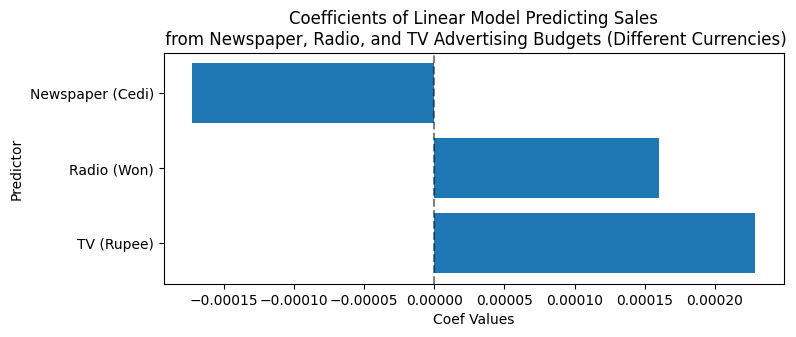

In [12]:
plt.figure(figsize=(8,3))
plt.barh(X2.columns, lm2.coef_)
plt.axvline(0, c='k', ls='--', alpha=0.5)
plt.ylabel('Predictor')
plt.xlabel('Coef Values')
plt.title('Coefficients of Linear Model Predicting Sales\n from Newspaper, '\
            'Radio, and TV Advertising Budgets (Different Currencies)')

**Q5**: Based on the plot above, which advertising in which type of media has the *least* effect on sales?

A. Newspaper\
**B. Radio**\
C. TV


**Q6**: True or False: This is the same interpretation we had in our original model where all budgets were in dollars.
**False**

**Q7**: Imagine we have a 3rd regression models whose budgets have again been converted to 3 different currencies.\
True or False: we can compare the 2nd and 3rd models' MSE losses to determine which model's coefficients provide a more accurate interpretation of what type of media advertising has the largest effect on `Sales`.
**False**

Finally, it's important to recognize the limits of the x-axis differ between the two bar plots we've seen so far. We can better appreciate this difference by ploting both with a shared x-axis.

Text(0.5, 0, 'Coefficient Values')

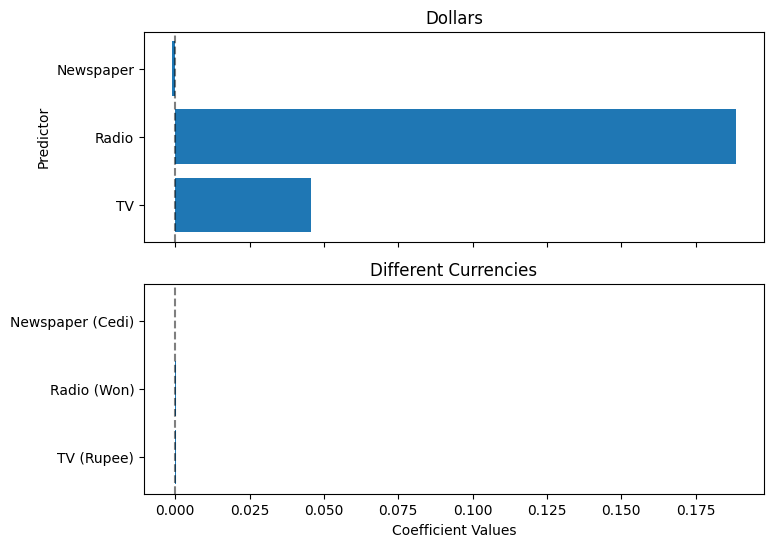

In [13]:
fig, axes = plt.subplots(2,1, figsize=(8,6), sharex=True)

axes[0].barh(X.columns, lm.coef_)
axes[0].set_title('Dollars')
axes[1].barh(X2.columns, lm2.coef_)
axes[1].set_title('Different Currencies')
for ax in axes:
    ax.axvline(0, c='k', ls='--', alpha=0.5)
axes[0].set_ylabel('Predictor')
axes[1].set_xlabel('Coefficient Values')